# Opossum Basic
A synthetic data generator for causal impact and uplift analysis.

We are setting out to make a dataset that is simple and pretty small.

In [2]:
from opossum import UserInterface
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Settings
6 features will be continuous
4 features will be categorical (100% binary)

Assignment to exposure of advertisement (treatment) will be random at a probably of 50%

The intensity of the lift will be moderate (8 on a scale of 10)

In [3]:
# number of observations N and number of covariates k
N = 50000
k = 10

# initilizing class
u = UserInterface(N, k, seed=847, categorical_covariates = [4,2])

# assign treatment and generate treatment effect inside of class object
u.generate_treatment(random_assignment = True, 
                     assignment_prob = 0.5, 
                     treatment_option_weights = [.10,.033,0.80,0.033,0.034,.0], 
                     intensity = 10)

This will generate the needed output as four objects.
 - X contains the features
 - y contains the outcome
 - assignment represents if they were exposed to treatment
 - treatment represents the effect of treatment

In [4]:
# Creating continuous y with partial nonlinear relation 
    #X contains the features, y contains the outcome,
    #assignment represents if they were exposed to treatment
y, X, assignment, treatment = u.output_data(binary=False, x_y_relation = 'linear_simple')

In [5]:
sim_data_X = pd.DataFrame(X)
sim_data_y = pd.DataFrame(y)
sim_data_assign = pd.DataFrame(assignment)
sim_data_treat = pd.DataFrame(treatment)

In [6]:
sim_data_X = sim_data_X.rename(columns=lambda s: 'feature_'+str(s))
sim_data_y = sim_data_y.rename(columns={0:'response_cont'})
sim_data_assign = sim_data_assign.rename(columns={0:'exposed'})
sim_data_treat = sim_data_treat.rename(columns={0:'true_lift'})

In [7]:
sim_data = pd.merge(sim_data_X, sim_data_y, left_index=True, right_index=True)
sim_data = pd.merge(sim_data, sim_data_assign, left_index=True, right_index=True)
sim_data = pd.merge(sim_data, sim_data_treat, left_index=True, right_index=True)
sim_data.sample(25)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,response_cont,exposed,true_lift
21506,1.0,0.0,1.0,0.0,2.155448,0.033159,1.787768,-1.835746,-1.255110,0.839666,3.388751,1,0.736314
33402,1.0,0.0,1.0,1.0,-0.340882,0.018064,-0.885466,-0.796198,0.653962,0.694969,0.271448,0,0.000000
4259,0.0,0.0,1.0,0.0,-1.795870,-0.728151,0.141135,3.148272,1.416452,2.543406,-1.084825,0,0.000000
15812,0.0,0.0,1.0,0.0,-0.816898,0.952955,2.011959,-1.525844,-0.827896,-0.480702,1.317494,0,0.000000
2103,1.0,1.0,1.0,1.0,-0.425403,-2.367043,-2.096181,-1.107911,0.960266,-0.688364,-0.195929,0,0.000000
35980,0.0,0.0,1.0,0.0,-1.571334,-0.448516,0.089660,1.653425,0.539207,3.223408,0.637792,0,0.000000
3097,0.0,0.0,1.0,0.0,-1.465688,-1.722329,0.125052,3.292076,0.839727,3.306909,0.025863,1,0.000000
2818,0.0,0.0,1.0,1.0,2.813737,-0.867313,1.354885,2.039070,0.516215,-0.570346,5.005760,1,2.481033
29977,1.0,1.0,1.0,1.0,-2.656314,-2.860969,-3.330879,-1.297415,1.056418,-1.294238,0.068777,0,0.000000
6364,1.0,1.0,1.0,0.0,0.526664,-1.056221,-1.266250,1.922727,3.235921,-0.108644,1.890046,1,0.399169


## Custom Binary Response

We will have a binary response built on the top 50 percentile of the response cont field

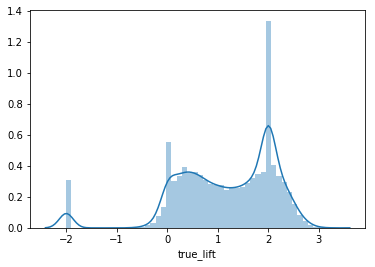

In [8]:
sns.distplot(sim_data[sim_data['exposed']==1]['true_lift']);

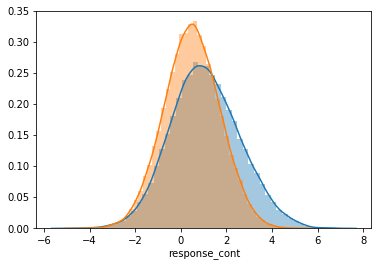

In [9]:
sns.distplot(sim_data['response_cont']);
sns.distplot(sim_data['response_cont']-sim_data['true_lift']);

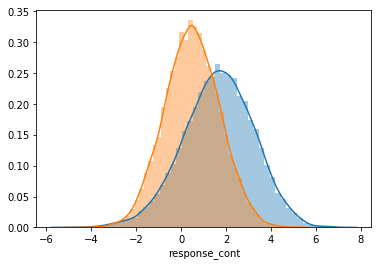

In [10]:
exposed_df = sim_data[sim_data['exposed']==1]
sns.distplot(exposed_df['response_cont']);
sns.distplot(exposed_df['response_cont']-exposed_df['true_lift']);

In [11]:
sim_data['response_cont_prior'] = sim_data['response_cont']-sim_data['true_lift']

In [12]:
sim_data['conversion'] = 0
sim_data['conversion_post'] = 0
sim_data.loc[sim_data['response_cont_prior'] < sim_data['response_cont_prior'].quantile(q=.50), 'conversion'] = 0
sim_data.loc[sim_data['response_cont_prior'] >= sim_data['response_cont_prior'].quantile(q=.50), 'conversion'] = 1
sim_data.loc[sim_data['response_cont'] < sim_data['response_cont_prior'].quantile(q=.50), 'conversion_post'] = 0
sim_data.loc[sim_data['response_cont'] >= sim_data['response_cont_prior'].quantile(q=.50), 'conversion_post'] = 1

In [13]:
def segments_f(row):
        if row['conversion_post'] == 1 and row['conversion'] == 0:
            return 'persuadable'
        elif row['conversion_post'] == 1 and row['conversion'] == 1:
            return 'sure_thing'
        elif row['conversion_post'] == 0 and row['conversion'] == 1:
            return 'sleeping_dog'
        elif row['conversion_post'] == 0 and row['conversion'] == 0:
            return 'lost_cause'

sim_data['segments'] = sim_data.apply(segments_f, axis=1)

In [ ]:
my_pal = {"sure_thing": "#dbd7d7", "lost_cause": "#dbd7d7", "persuadable":"#d93b3b", "sleeping_dog":'#dbd7d7'}

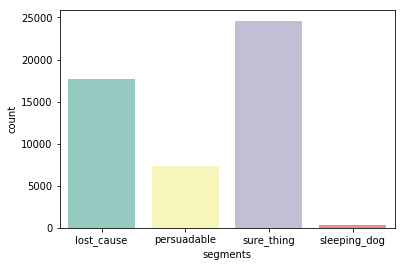

In [16]:
sns.countplot(x="segments", data=sim_data, order=["lost_cause","persuadable","sure_thing","sleeping_dog"], palette='Set3');

In [39]:
sim_data['segments'].value_counts()

sure_thing      24600
lost_cause      17629
persuadable      7371
sleeping_dog      400
Name: segments, dtype: int64

In [40]:
#conversions with no marketing
print('conversions with no marketing: ', sim_data['conversion'].sum())
print('base propensity: {:.2f}'.format(sim_data['conversion'].sum()/len(sim_data['conversion'])))
print('conversions with marketing: ', sim_data['conversion_post'].sum())
#Persuadables
print('persuadables: ',sim_data[sim_data['segments']=='persuadable']['segments'].count())

print('pursuadable rate: {:.2f}'.format(sim_data[sim_data['segments']=='persuadable']['segments'].count()/len(sim_data['conversion'])))

conversions with no marketing:  25000
base propensity: 0.50
conversions with marketing:  31971
persuadables:  7371
pursuadable rate: 0.15


In [43]:
filepath = ('/nas/isg_prodops_work/stemr/2020/2020_03 - Capstone Project/')
sim_data.to_csv(filepath + 'opossum_sim_basic.csv', index=False)

In [42]:
sim_data_sample = sim_data.sample(100)
sim_data_sample.to_csv(filepath + 'opossum_sim_simple_samp.csv', index=False)